In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from categories import store_categories
import random
import numpy as np
import seaborn as sns

In [106]:
%load_ext autoreload
%autoreload 2
%run scraper.py
from scraper import BankScraper

with open("username") as file:
    username = file.read()

with open("password") as file:
    password = file.read()


scraper = BankScraper()
scraper.login(username, password)
df = scraper.getAccountTransactions()
scraper.logout()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
df

,date,description,amount,balance,account,category
0,2023-11-15,SMITHS FOOD #4136 PROVO U,13.34,1182.55,Credit Card,Groceries
1,2023-11-15,GUSTO DES:PAY 299761 ID:6semjvkdmlj INDN:Linds...,2685.36,8652.17,Checking,Deposit
2,2023-11-14,SMITHS FOOD #4136 PROVO U,14.76,1169.21,Credit Card,Groceries
3,2023-11-13,WM SUPERCENTER #3208 SPRINGVILLE U,91.18,3818.46,Credit Card,Groceries
4,2023-11-13,Online Banking payment to CRD 9258 Confirmatio...,-2713.50,6008.21,Checking,Transfer
...,...,...,...,...,...,...
235,2023-07-24,4TE*CITY OF PROVO UT PROVO U,12.00,1022.96,Credit Card,Other
236,2023-07-24,CHICK-FIL-A #03304 PROVO U,26.09,851.86,Credit Card,Fast Food
237,2023-07-24,SMITHS FOOD #4136 PROVO U,15.59,894.71,Credit Card,Groceries
238,2023-07-22,SHELL OIL12509240011 PROVO U,61.16,825.77,Credit Card,Gas


In [48]:
def make_dummy_data():
    dummy = pd.DataFrame()
    dummy['date'] = pd.date_range('2023-09-01', '2023-10-31')
    descriptions = []
    categories = []
    costs = []
    for _ in range(len(dummy)):
        store, category = random.choice(list(store_categories.items()))
        descriptions.append(store)
        categories.append(category)
        costs.append(round(np.random.gamma(.5, 100, size = 1)[0], 2))
    
    dummy['description'] = descriptions
    dummy['category'] = categories
    dummy['amount'] = costs
    dummy['account'] = 'Credit Card'
    dummy['balance'] = round(dummy['amount'].cumsum(),2)
    dummy.sort_values(by='date', ascending=False, inplace=True)
    dummy.to_csv('dummy_data.csv')

In [49]:
make_dummy_data()

In [93]:
df = pd.read_csv('dummy_data.csv', index_col=0,  parse_dates=['date'])
df

,date,description,category,amount,account,balance
60,2023-10-31,WM SUPERCENTER,Groceries,66.36,Credit Card,2371.58
59,2023-10-30,LAZ PKG,Parking,4.77,Credit Card,2305.22
58,2023-10-29,UTAH FIRST CU,Car Payment,15.78,Credit Card,2300.45
57,2023-10-28,UTAH DMV OFFICES,Car,0.80,Credit Card,2284.67
56,2023-10-27,SALT & STRAW ICE CREA,Food - Desserts,45.14,Credit Card,2283.87
...,...,...,...,...,...,...
4,2023-09-05,AMERICAN AIR,Airline,6.93,Credit Card,252.83
3,2023-09-04,UTAH DMV OFFICES,Car,63.12,Credit Card,245.90
2,2023-09-03,PROVO CITY UTILI DES,Utilities,156.54,Credit Card,182.78
1,2023-09-02,SMITHS FUEL,Gas,24.74,Credit Card,26.24


In [51]:
credit_card_cat = df.loc[(df['date'].dt.month == 10) & (df['account']== 'Credit Card') & (df['category'] != 'Credit Card Payment') & (~df['description'].str.contains('PREMIERCLUB'))].groupby('category')['amount'].sum().sort_values()

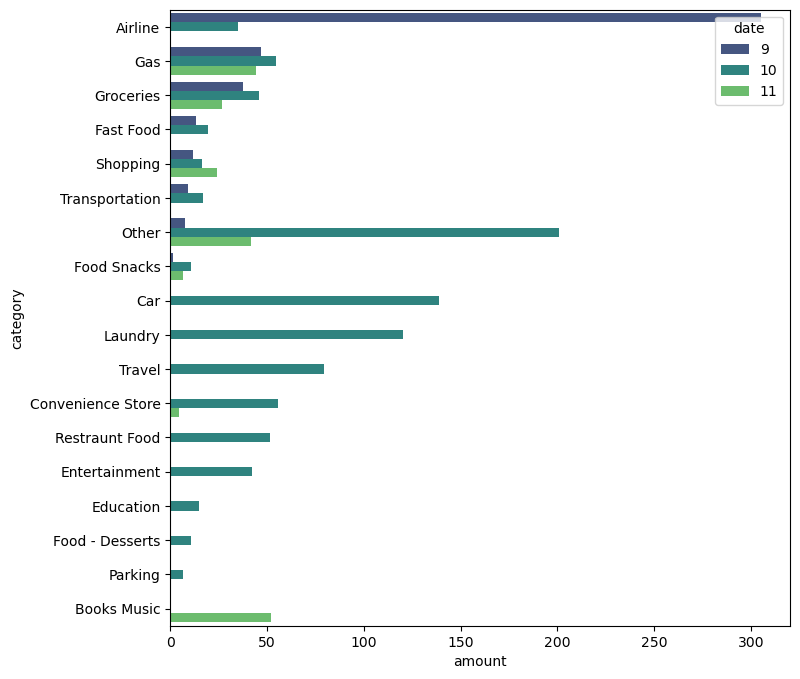

In [111]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(df.loc[(df['account'] == "Credit Card") & (df['category'] != "Credit Card Payment") & (df['date'].dt.month > 8)].groupby([ df['date'].dt.month,'category'])['amount'].mean().reset_index().sort_values(['date', 'amount'], ascending=[True, False]).reset_index(drop=True),
            x = 'amount', y = 'category', hue='date', palette='viridis')
plt.show()

In [94]:
sns.

,date,description,category,amount,account,balance
60,2023-10-31,WM SUPERCENTER,Groceries,66.36,Credit Card,2371.58
59,2023-10-30,LAZ PKG,Parking,4.77,Credit Card,2305.22
58,2023-10-29,UTAH FIRST CU,Car Payment,15.78,Credit Card,2300.45
57,2023-10-28,UTAH DMV OFFICES,Car,0.80,Credit Card,2284.67
56,2023-10-27,SALT & STRAW ICE CREA,Food - Desserts,45.14,Credit Card,2283.87
...,...,...,...,...,...,...
4,2023-09-05,AMERICAN AIR,Airline,6.93,Credit Card,252.83
3,2023-09-04,UTAH DMV OFFICES,Car,63.12,Credit Card,245.90
2,2023-09-03,PROVO CITY UTILI DES,Utilities,156.54,Credit Card,182.78
1,2023-09-02,SMITHS FUEL,Gas,24.74,Credit Card,26.24


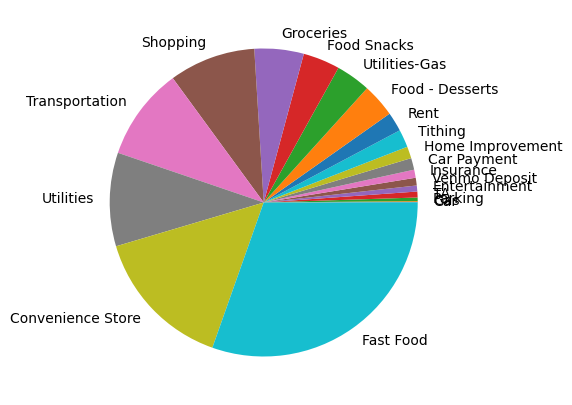

In [53]:
fig, ax = plt.subplots(figsize = (8,5))
ax.pie(credit_card_cat, labels = credit_card_cat.index)
plt.show()

In [48]:
with open('apikey.txt', "r") as file:
    # Read the entire file content into a string
    key = file.read()

url = 'https://api.nasa.gov/neo/rest/v1/neo/browse?'

df = pd.DataFrame()

for page in range(1590, 1657):
    body = {
        # "start_date" : '2010-01-01',
        # 'end_date' : '2021-01-01',
        'api_key' : key,
        'page' : page
    }

    # Make the GET request
    r = requests.get(url, params=body)

    # Handle the response as needed
    if r.status_code == 200:
        # data = r.json()
        # Process and work with the data
        new_df = (pd.json_normalize(r.json()['near_earth_objects']))
        df = pd.concat([df, new_df], ignore_index=True)
        
    else:
        print("API request failed with status code:", r.status_code)


API request failed with status code: 500


In [76]:
body = {
    # "start_date" : '2010-01-01',
    # 'end_date' : '2021-01-01',
    'api_key' : key,
    'page' : 0
}

# Make the GET request
r = requests.get(url, params=body)

# Handle the response as needed
if r.status_code == 200:
    # data = r.json()
    # Process and work with the data
    new_df = (pd.json_normalize(r.json()['near_earth_objects']))
    df = pd.concat([df, new_df], ignore_index=True)
    
else:
    print("API request failed with status code:", r.status_code)


In [104]:
r.json()

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=XoJZREDn8XawkDProJbVqxUl0kfbf9PK6K15jBK7',
  'self': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=XoJZREDn8XawkDProJbVqxUl0kfbf9PK6K15jBK7'},
 'page': {'size': 20,
  'total_elements': 33125,
  'total_pages': 1657,
  'number': 0},
 'near_earth_objects': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=XoJZREDn8XawkDProJbVqxUl0kfbf9PK6K15jBK7'},
   'id': '2000433',
   'neo_reference_id': '2000433',
   'name': '433 Eros (A898 PA)',
   'name_limited': 'Eros',
   'designation': '433',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
   'absolute_magnitude_h': 10.41,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 22.0067027115,
     'estimated_diameter_max': 49.2084832235},
    'meters': {'estimated_diameter_min': 22006.7027114738,
     'estimated_diameter_max': 49208.4832234845},
    'miles': {'estimated_diameter_min': 13.

In [133]:
pd.json_normalize(r.json()['near_earth_objects']).drop(columns=['id', 'name_limited', 'designation', 'nasa_jpl_url', 'links.self','estimated_diameter.kilometers.estimated_diameter_min','is_sentry_object','estimated_diameter.kilometers.estimated_diameter_max','estimated_diameter.meters.estimated_diameter_min','estimated_diameter.meters.estimated_diameter_max','estimated_diameter.miles.estimated_diameter_min','estimated_diameter.miles.estimated_diameter_max','orbital_data.orbit_id','orbital_data.perihelion_argument','orbital_data.perihelion_time','orbital_data.mean_anomaly','orbital_data.equinox','orbital_data.orbit_class.orbit_class_description','orbital_data.orbit_class.orbit_class_range'])

,neo_reference_id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max,orbital_data.orbit_determination_date,orbital_data.first_observation_date,orbital_data.last_observation_date,...,orbital_data.epoch_osculation,orbital_data.eccentricity,orbital_data.semi_major_axis,orbital_data.inclination,orbital_data.ascending_node_longitude,orbital_data.orbital_period,orbital_data.perihelion_distance,orbital_data.aphelion_distance,orbital_data.mean_motion,orbital_data.orbit_class.orbit_class_type
0,2000433,433 Eros (A898 PA),10.41,False,"[{'close_approach_date': '1900-12-27', 'close_...",72200.470524,161445.160099,2021-05-24 17:55:05,1893-10-29,2021-05-13,...,2460200.5,.2227966940876033,1.458117412303767,10.82792727465937,304.2859920775314,643.1128260948039,1.133253673250917,1.782981151356617,.5597773600412238,AMO
1,2000719,719 Albert (A911 TB),15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",6645.689217,14860.212847,2023-03-01 06:08:09,1911-10-04,2022-08-05,...,2460200.5,.5469896284326333,2.636410360853509,11.57585279618993,183.8538961684531,1563.572204590242,1.194321237174303,4.078499484532715,.2302420054175519,AMO
2,2000887,887 Alinda (A918 AA),13.88,False,"[{'close_approach_date': '1910-01-04', 'close_...",14606.293658,32660.665518,2023-07-08 20:20:42,1918-02-03,2023-07-08,...,2460200.5,.570891973204688,2.47228899420719,9.397963446547879,110.4230822500002,1419.865739886107,1.060879051972014,3.883698936442366,.2535450992914844,AMO
3,2001036,1036 Ganymed (A924 UB),9.26,False,"[{'close_approach_date': '1910-02-25', 'close_...",122613.990772,274173.218359,2023-08-07 06:07:57,1924-10-23,2023-08-06,...,2460200.5,.5329372611770296,2.665809142787555,26.68740598921981,215.4976033452238,1589.798220485248,1.24510011940967,4.08651816616544,.226443831274461,AMO
4,2001221,1221 Amor (1932 EA1),17.37,False,"[{'close_approach_date': '1900-03-08', 'close_...",2927.790706,6546.739043,2023-08-03 06:54:11,1932-03-12,2023-07-28,...,2460200.5,.4356708050053484,1.9190799986272,11.88204219950292,171.3194305317,971.0420689840624,1.082992870755625,2.755167126498775,.3707357399835873,AMO
5,2001566,1566 Icarus (1949 MA),16.59,True,"[{'close_approach_date': '1902-06-11', 'close_...",4193.146421,9376.160437,2023-08-03 06:54:12,1949-07-01,2023-07-15,...,2460200.5,.8268901799262436,1.078078246673913,22.80104900054236,87.95270566083883,408.8592723223781,.1866259313071519,1.969530562040674,.8804985587220497,APO
6,2001580,1580 Betulia (1950 KA),14.69,False,"[{'close_approach_date': '1911-05-07', 'close_...",10058.657669,22491.842309,2023-03-01 06:08:13,1950-05-22,2022-12-22,...,2460200.5,.4870368288104264,2.197508867210378,52.14655994547876,62.23070971476279,1189.855934819592,1.127241117241443,3.267776617179313,.3025576369920647,AMO
7,2001620,1620 Geographos (1951 RA),15.27,True,"[{'close_approach_date': '1901-08-23', 'close_...",7700.874181,17219.678155,2023-05-20 07:29:30,1951-09-14,2023-04-21,...,2460200.5,.335516791397941,1.245685842302646,13.33611498036324,337.1718931531783,507.8216587204143,.8277373254034206,1.663634359201871,.7089102912764915,APO
8,2001627,1627 Ivar (1929 SH),12.85,False,"[{'close_approach_date': '1901-07-11', 'close_...",23471.455833,52483.770773,2023-08-12 06:19:10,1929-09-25,2023-08-10,...,2460200.5,.3964298904297617,1.86352274199862,8.450493491417463,133.1150849950102,929.1813249549572,1.124766625574738,2.602278858422502,.3874378340712469,AMO
9,2001685,1685 Toro (1948 OA),14.33,False,"[{'close_approach_date': '1900-08-02', 'close_...",11872.441213,26547.585612,2023-08-08 06:02:34,1948-07-17,2023-08-07,...,2460200.5,.4360725081621467,1.367506874137516,9.383400219241253,274.2219785648123,584.1073942483155,.7711747216033923,1.96383902667164,.6163250175308634,APO


In [132]:
pd.json_normalize(r.json()['near_earth_objects'][0]['close_approach_data'])

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles
0,1900-12-27,1900-Dec-27 01:30,-2177879400000,Earth,5.5786191875,20083.0290749201,12478.8132604691,0.3149291693,122.5074468577,47112732.928149391,29274494.7651919558
1,1907-11-05,1907-Nov-05 03:31,-1961526540000,Earth,4.3944908885,15820.1671985367,9830.0366684463,0.4714855425,183.4078760325,70533232.893794475,43827318.620434755
2,1917-04-20,1917-Apr-20 21:19,-1663036860000,Earth,4.8167840184,17340.4224662258,10774.6641707501,0.499257206,194.211053134,74687814.59975122,46408855.985038036
3,1924-03-05,1924-Mar-05 22:13,-1446083220000,Earth,4.5960548855,16545.797587763,10280.915173352,0.3597864889,139.9569441821,53823292.394218643,33444243.0636095534
4,1931-01-30,1931-Jan-30 04:07,-1228247580000,Earth,5.9208185341,21314.9467227704,13244.2789789347,0.1740731458,67.7144537162,26040971.835879446,16181109.5707945148
5,1938-01-13,1938-Jan-13 22:04,-1008726960000,Earth,6.0840524046,21902.5886564605,13609.4168237879,0.2150052405,83.6370385545,32164326.017637735,19985985.424901343
6,1944-11-27,1944-Nov-27 01:41,-791936340000,Earth,3.626098636,13053.9550896485,8111.2200388986,0.4030090561,156.7705228229,60289296.383270507,37462031.6350747166
7,1961-04-04,1961-Apr-04 09:08,-275928720000,Earth,3.7078364482,13348.2112136055,8294.0593510317,0.4424921301,172.1294386089,66195880.154722887,41132212.6021023606
8,1968-02-11,1968-Feb-11 13:46,-59566440000,Earth,6.0668849725,21840.7859008821,13571.014994912,0.2662714057,103.5795768173,39833635.134625859,24751473.1315964942
9,1975-01-23,1975-Jan-23 07:39,159694740000,Earth,5.8253076833,20971.1076598791,13030.6307567732,0.1511341909,58.7912002601,22609353.042813383,14048800.5292673654


In [128]:
pd.json_normalize(r.json()['near_earth_objects']['close_approach_data'])

TypeError: list indices must be integers or slices, not str

In [49]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor

def fetch_data(page):
    body = {
        'api_key': key,
        'page': page
    }

    r = requests.get(url, params=body)

    if r.status_code == 200:
        data = r.json()
        new_df = pd.json_normalize(data['near_earth_objects'])
        return new_df
    else:
        print(f"API request for page {page} failed with status code:", r.status_code)
        return None

# Initialize an empty DataFrame
df = pd.DataFrame()

# Number of pages to fetch
start_page = 0
end_page = 1657

# Use ThreadPoolExecutor to fetch data concurrently
with ThreadPoolExecutor() as executor:
    results = list(executor.map(fetch_data, range(start_page, end_page + 1)))

# Concatenate the results into a single DataFrame
for result in results:
    if result is not None:
        df = pd.concat([df, result], ignore_index=True)

print("Total number of records retrieved:", len(df))


Total number of records retrieved: 33125


In [57]:
df.to_csv('asteriod_dirty.csv', index=False)

In [58]:
df = pd.read_csv('asteriod_dirty.csv')

C:\Users\gmspr\AppData\Local\Temp\ipykernel_19140\1958931383.py:1: DtypeWarning: Columns (2,3,5,21,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('asteriod_dirty.csv')


In [66]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'neo_reference_id', 'name',
       'name_limited', 'designation', 'nasa_jpl_url', 'absolute_magnitude_h',
       'is_potentially_hazardous_asteroid', 'close_approach_data',
       'is_sentry_object', 'links.self',
       'estimated_diameter.kilometers.estimated_diameter_min',
       'estimated_diameter.kilometers.estimated_diameter_max',
       'estimated_diameter.meters.estimated_diameter_min',
       'estimated_diameter.meters.estimated_diameter_max',
       'estimated_diameter.miles.estimated_diameter_min',
       'estimated_diameter.miles.estimated_diameter_max',
       'estimated_diameter.feet.estimated_diameter_min',
       'estimated_diameter.feet.estimated_diameter_max',
       'orbital_data.orbit_id', 'orbital_data.orbit_determination_date',
       'orbital_data.first_observation_date',
       'orbital_data.last_observation_date', 'orbital_data.data_arc_in_days',
       'orbital_data.observations_used', 'orbital_data.orbit_uncertainty

In [68]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'id','links.self'], axis=1)

,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,estimated_diameter.kilometers.estimated_diameter_min,...,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range,sentry_data
0,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.410,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,22.006703,...,178.907764,1.782981,2.460446e+06,222.762895,0.559777,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
1,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.590,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,2.025606,...,156.230218,4.078499,2.459956e+06,56.294282,0.230242,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
2,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.880,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,4.451998,...,350.473696,3.883699,2.460679e+06,238.760540,0.253545,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
3,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.260,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,37.372743,...,132.477403,4.086518,2.460570e+06,276.417166,0.226444,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
4,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.370,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,0.892391,...,26.648295,2.755167,2.459867e+06,123.533523,0.370736,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33120,54376902,(2023 PC1),NaN,2023 PC1,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54376902,22.153,False,"[{'close_approach_date': '2023-08-21', 'close_...",False,0.098618,...,255.209267,4.627775,2.460221e+06,346.933339,0.249188,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...,NaN
33121,54376901,(2023 PD1),NaN,2023 PD1,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54376901,25.406,False,"[{'close_approach_date': '2023-08-18', 'close_...",False,0.022047,...,213.385675,2.732283,2.460194e+06,350.327369,0.383429,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU,NaN
33122,54376903,(2023 PH1),NaN,2023 PH1,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54376903,27.719,False,"[{'close_approach_date': '1948-05-26', 'close_...",False,0.007599,...,324.283633,1.068730,2.460286e+06,261.712801,1.145552,J2000,ATE,Near-Earth asteroid orbits similar to that of ...,a (semi-major axis) < 1.0 AU; q (perihelion) >...,NaN
33123,54376904,(2023 PJ1),NaN,2023 PJ1,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54376904,22.819,False,"[{'close_approach_date': '2023-07-26', 'close_...",False,0.072570,...,80.077649,3.693387,2.460122e+06,13.296036,0.277279,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...,NaN


In [74]:
df['close_approach_data'][0]

"[{'close_approach_date': '1900-12-27', 'close_approach_date_full': '1900-Dec-27 01:30', 'epoch_date_close_approach': -2177879400000, 'relative_velocity': {'kilometers_per_second': '5.5786191875', 'kilometers_per_hour': '20083.0290749201', 'miles_per_hour': '12478.8132604691'}, 'miss_distance': {'astronomical': '0.3149291693', 'lunar': '122.5074468577', 'kilometers': '47112732.928149391', 'miles': '29274494.7651919558'}, 'orbiting_body': 'Earth'}, {'close_approach_date': '1907-11-05', 'close_approach_date_full': '1907-Nov-05 03:31', 'epoch_date_close_approach': -1961526540000, 'relative_velocity': {'kilometers_per_second': '4.3944908885', 'kilometers_per_hour': '15820.1671985367', 'miles_per_hour': '9830.0366684463'}, 'miss_distance': {'astronomical': '0.4714855425', 'lunar': '183.4078760325', 'kilometers': '70533232.893794475', 'miles': '43827318.620434755'}, 'orbiting_body': 'Earth'}, {'close_approach_date': '1917-04-20', 'close_approach_date_full': '1917-Apr-20 21:19', 'epoch_date_c